<a class="anchor" id="2nd-bullet">

### 1.1. Import the needed libraries
    
</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from numpy import mean
from numpy import std

# data partition
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle

# scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer

# models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

# metric
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

# oversampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.feature_selection import RFE

# embedded methods
from sklearn.linear_model import LassoCV

import warnings
warnings.filterwarnings('ignore')

<a class="anchor" id="3rd-bullet">

### Import the dataset
    
</a>

In [2]:
df = pd.read_csv('train.csv')
df.set_index('Access_ID', inplace = True)
df.head(3)

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy
Access_ID,,,,,,,,,,,,,,,,
102863333,21-Mar-20,0,0.0,0,0.0,3,64.0,0.0000,0.0667,0.0,MacOSX,2,Portugal,1,Returner,0
103117814,20-May-20,0,0.0,0,0.0,23,684.5,0.0217,0.0449,0.0,Windows,2,France,6,Returner,0
103201891,4-Dec-20,0,0.0,0,0.0,8,95.0,0.0250,0.0583,0.0,Windows,4,Italy,1,Returner,0


<a class="anchor" id="4th-bullet">


## 3. Data Understanding

</a>



<a class="anchor" id="4th-bullet">


### 3.1 Logical Checks

</a>



In [3]:
#Check the info of the dataset
df.info()
#no missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 102863333 to 798444008
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        9999 non-null   object 
 1   AccountMng_Pages            9999 non-null   int64  
 2   AccountMng_Duration         9999 non-null   float64
 3   FAQ_Pages                   9999 non-null   int64  
 4   FAQ_Duration                9999 non-null   float64
 5   Product_Pages               9999 non-null   int64  
 6   Product_Duration            9999 non-null   float64
 7   GoogleAnalytics_BounceRate  9999 non-null   float64
 8   GoogleAnalytics_ExitRate    9999 non-null   float64
 9   GoogleAnalytics_PageValue   9999 non-null   float64
 10  OS                          9999 non-null   object 
 11  Browser                     9999 non-null   int64  
 12  Country                     9999 non-null   object 
 13  Type_of_Traffic     

In [4]:
#fix data types - will create dummy variables later
df.Type_of_Traffic = df.Type_of_Traffic.astype("str")
df.Browser = df.Browser.astype("str")
df["Date"]=pd.to_datetime(df["Date"])

In [5]:
# check distribution of target variable
print(df["Buy"].value_counts())
print("Percent of positive labels: " + str(round(df["Buy"].value_counts()[1]/len(df),2)))

0    8447
1    1552
Name: Buy, dtype: int64
Percent of positive labels: 0.16


<a class="anchor" id="4th-bullet">


### 3.2 Data exploration

</a>



In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountMng_Pages,9999.0,2.324232,3.340676,0.0,0.0000,1.0000,4.00000,27.0000
AccountMng_Duration,9999.0,81.205854,179.715545,0.0,0.0000,7.5000,92.20835,3398.7500
FAQ_Pages,9999.0,0.508051,1.279390,0.0,0.0000,0.0000,0.00000,24.0000
FAQ_Duration,9999.0,34.559101,139.796989,0.0,0.0000,0.0000,0.00000,2549.3750
Product_Pages,9999.0,31.685869,44.550277,0.0,7.0000,18.0000,38.00000,705.0000
Product_Duration,9999.0,1199.769430,1958.276304,0.0,183.5625,599.0000,1470.27080,63973.5222
GoogleAnalytics_BounceRate,9999.0,0.022305,0.048776,0.0,0.0000,0.0032,0.01680,0.2000
GoogleAnalytics_ExitRate,9999.0,0.043181,0.048845,0.0,0.0143,0.0251,0.05000,0.2000
GoogleAnalytics_PageValue,9999.0,5.963120,18.753626,0.0,0.0000,0.0000,0.00000,361.7637
Buy,9999.0,0.155216,0.362128,0.0,0.0000,0.0000,0.00000,1.0000


#### Observations:
- the dataset don't have null values
- it has outliers in some features - need to explore and solve them
- it has 9.999 observations and 15 features (9 numerical and 6 categorical)
- the dependent variable is 'Buy'

In [7]:
# split the dataset
X = df.drop('Buy', axis=1)
y = df['Buy']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=5, stratify=y)

In [8]:
# Define metric and non-metric features
non_metric_features = ['Date', 'OS', 'Browser', 'Country', 'Type_of_Traffic', 'Type_of_Visitor']
metric_features = X_train.columns.drop(non_metric_features).to_list()

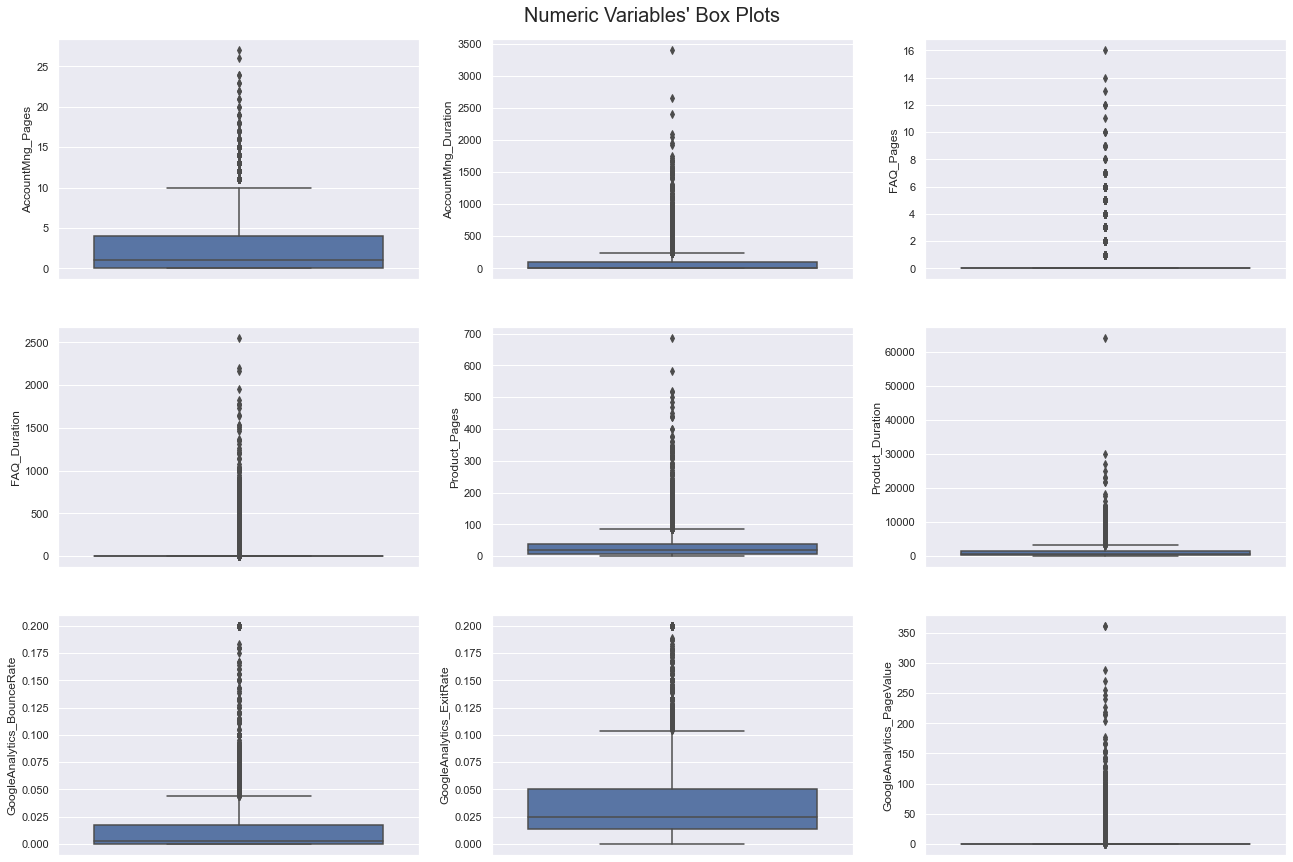

In [9]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(22, 15))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(y=X_train[feat], ax=ax)
    #ax.set_title(feat, y=-0.16)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title, y=0.91, fontsize=20)

# plt.savefig(os.path.join('..', 'figures', 'numeric_variables_boxplots.png'), dpi=200)
plt.show()

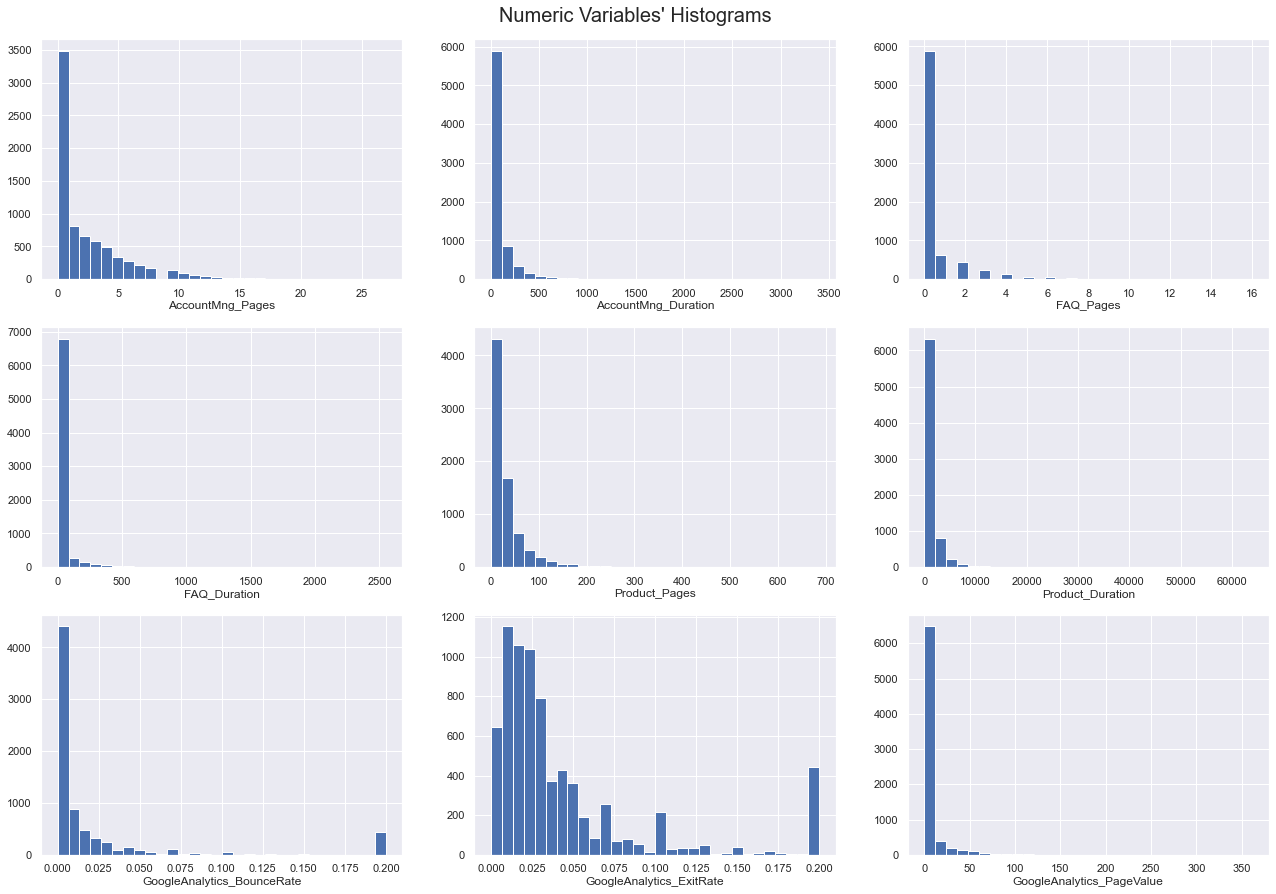

In [10]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(22, 15))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(X_train[feat], bins=30)
    ax.set_title(feat, y=-0.15)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title, y=0.91, fontsize=20)

# plt.savefig(os.path.join('..', 'figures', 'numeric_variables_histograms.png'), dpi=200)
plt.show()

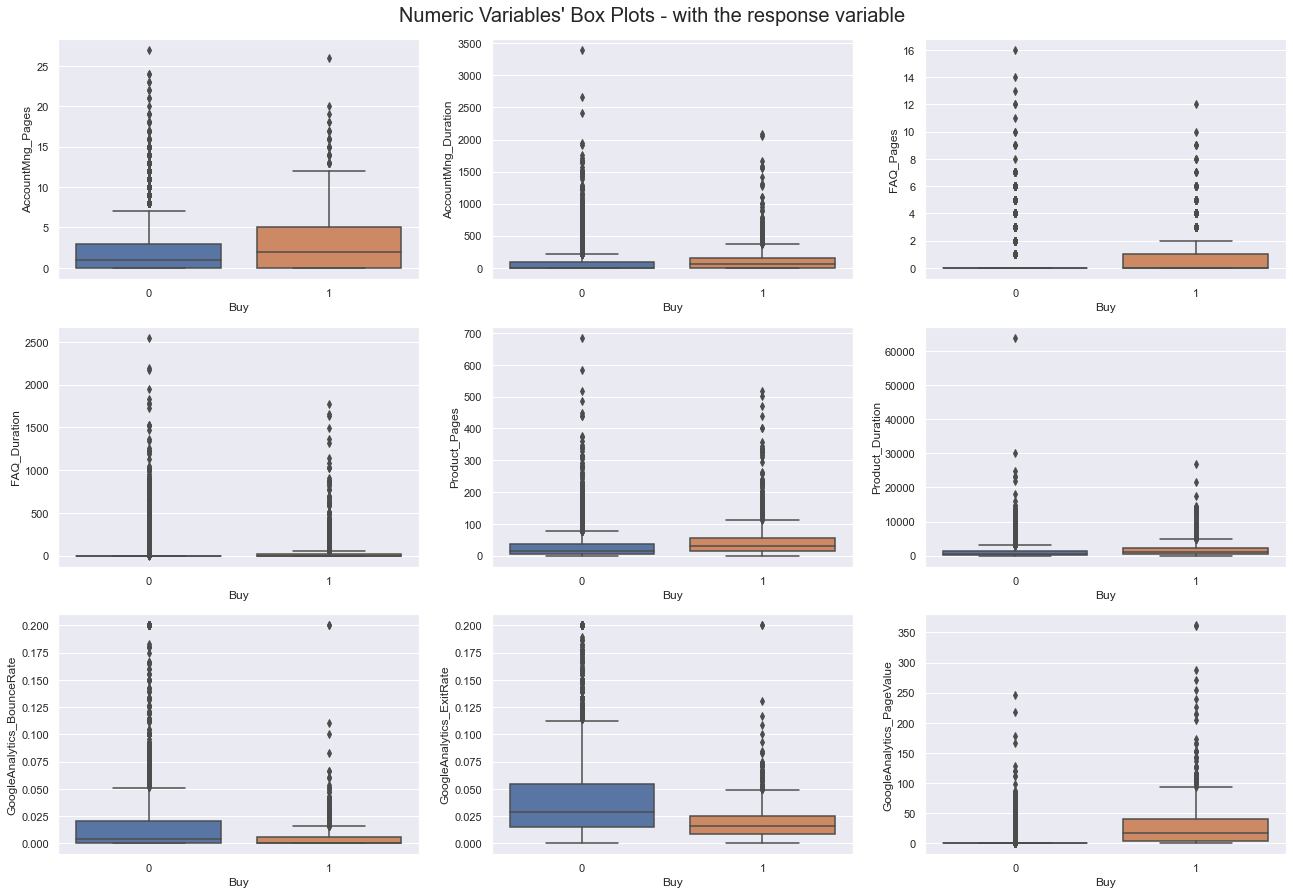

In [11]:
# All Numeric Variables' Box Plots in one figure - with the dependent variable
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(22, 15))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(y=X_train[feat], x=y_train, ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots - with the response variable"

plt.suptitle(title, y=0.91, fontsize=20)

# plt.savefig(os.path.join('..', 'figures', 'numeric_variables_boxplots.png'), dpi=200)
plt.show()

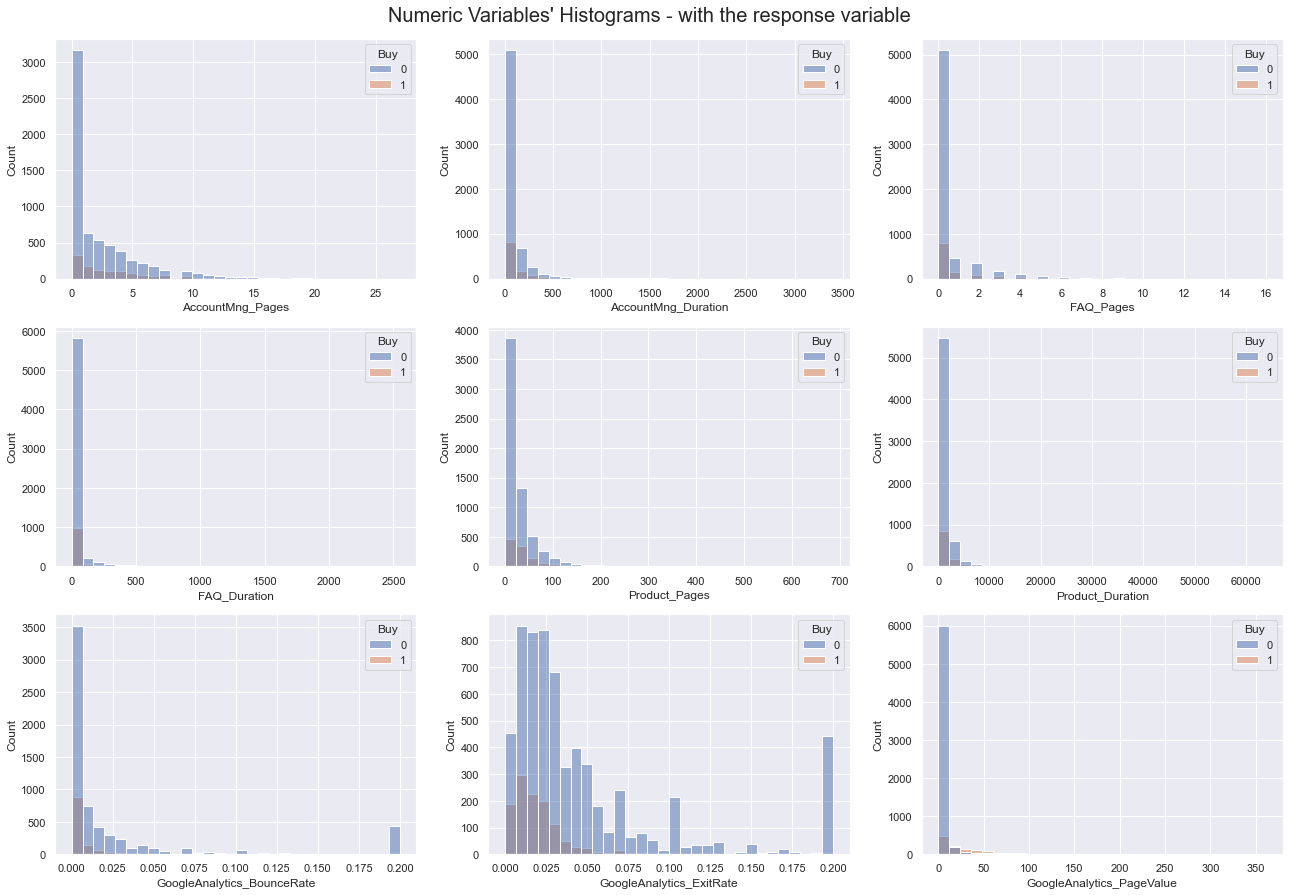

In [12]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(22, 15))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.histplot(data=X_train, x=feat, hue=y_train, ax=ax, bins=30)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms - with the response variable"

plt.suptitle(title, y=0.91, fontsize=20)

# plt.savefig(os.path.join('..', 'figures', 'numeric_variables_histograms.png'), dpi=200)
plt.show()

Observations:
- the dataset has outliers in all of the numeric features
- the data is right skewed in all of the numeric features, there is a lot of zero values in all features except in 'GoogleAnalytics_ExitRate'
- the distribution of the observations that didn't buy the products is very similar to those that bought the product. This means that it can be difficult to the model to learn the differences of these two groups

<a class="anchor" id="4th-bullet">


### 3.3 Outliers

</a>



In [13]:
#baseline model performance
X_train_num = X_train[metric_features]
X_val_num = X_val[metric_features]

In [14]:
#define model
model1 = LogisticRegression().fit(X_train_num, y_train)
y_pred_train = model1.predict(X_train_num)
y_pred_val = model1.predict(X_val_num)

#results
print('f1_train:', f1_score(y_train, y_pred_train))
print(confusion_matrix(y_val, y_pred_val))
print('precision:', precision_score(y_val, y_pred_val))
print('f1_val:', f1_score(y_val, y_pred_val))

f1_train: 0.4913693901035672
[[2063   49]
 [ 263  125]]
precision: 0.7183908045977011
f1_val: 0.44483985765124556


In [15]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train_backup = df_train.copy()

In [16]:
#function to automatically remove outliers besed on the IQR, not currently in use
def outliers(df_train,metric_features):
    for variable in metric_features:
        var_mean = df_train[variable].mean()
        var_std = df_train[variable].std()
        df_train=df_train.loc[df_train[variable] < var_mean + (5 * var_std)]
        df_train=df_train.loc[df_train[variable] > var_mean - (5 * var_std)]
    return df_train
df_train = outliers(df_train,metric_features)

In [17]:
print('Percentage of data kept after removing outliers:', np.round(df_train.shape[0] / df_train_backup.shape[0], 4))

Percentage of data kept after removing outliers: 0.9593


In [18]:
#testing model performance after removing outliers
X_train_num = df_train.drop(['Buy'], axis=1)[metric_features]
y_train = df_train['Buy']

In [19]:
#define model
model2 = LogisticRegression().fit(X_train_num, y_train)
y_pred_train = model2.predict(X_train_num)
y_pred_val = model2.predict(X_val_num)

#results
print('f1_train:', f1_score(y_train, y_pred_train))
print(confusion_matrix(y_val, y_pred_val))
print('precision:', precision_score(y_val, y_pred_val))
print('f1_val:', f1_score(y_val, y_pred_val))

f1_train: 0.5087719298245614
[[2038   74]
 [ 248  140]]
precision: 0.6542056074766355
f1_val: 0.46511627906976744


In [20]:
#resetting the dataset
df_train = df_train_backup.copy()

In [21]:
# Manually defined tresholds for outliers using boxplots

filters1 = (
    (df_train['AccountMng_Duration']<=2000)
    &(df_train['AccountMng_Pages']<=20)
    &(df_train['GoogleAnalytics_BounceRate']<=.17)
    &(df_train['FAQ_Duration']<=1500)
    &(df_train['FAQ_Pages']<=13)
    &(df_train['Product_Pages']<=500)
    &(df_train['Product_Duration']<=25000)
    &(df_train['GoogleAnalytics_PageValue']<=300)
)

filters2 = (
    (df_train['AccountMng_Duration']<=2000)
    &
    (df_train['FAQ_Duration']<=2000)
    &
    (df_train['Product_Pages']<=650)
    &
    (df_train['Product_Duration']<=50000)
    &
    (df_train['GoogleAnalytics_PageValue']<=350)
)

df_train = df_train[filters1]

print('Percentage of data kept after removing outliers:', np.round(df_train.shape[0] / df_train_backup.shape[0], 4))

Percentage of data kept after removing outliers: 0.9365


In [22]:
#testing model performance after removing outliers using manual thresholds
X_train_num = df_train.drop(['Buy'], axis=1)[metric_features]
y_train = df_train['Buy']

In [23]:
#define model
model3 = LogisticRegression().fit(X_train_num, y_train)
y_pred_train = model3.predict(X_train_num)
y_pred_val = model3.predict(X_val_num)

#results
print('f1_train:', f1_score(y_train, y_pred_train))
print(confusion_matrix(y_val, y_pred_val))
print('precision:', precision_score(y_val, y_pred_val))
print('f1_val:', f1_score(y_val, y_pred_val))

f1_train: 0.49624060150375937
[[2059   53]
 [ 262  126]]
precision: 0.7039106145251397
f1_val: 0.4444444444444445


Observations:
- at this stage, using automated outlier removal was the better option, but this was partially due to the inclusion of all numeric variables, like FAQ_Duration that has many outliers but not a lot of relevency. As we refine our variable selection, manual outlier selection produced a more accurate model. 
- filters2 is the result of finding the best outlier filters after feature selection, which we will use here to keep the results accurate to our report.

In [24]:
df_train = df_train_backup.copy()
#df_train = df_train[filters2]
print('Percentage of data kept after removing outliers:', np.round(df_train.shape[0] / df_train_backup.shape[0], 4))

Percentage of data kept after removing outliers: 1.0


<a class="anchor" id="4th-bullet">


## 4. Data Preparation

</a>



<a class="anchor" id="4th-bullet">


### 4.1 Feature Engineering and Transformation

</a>



In [25]:
X_train = df_train.drop(['Buy'], axis=1)
y_train = df_train['Buy']

In [26]:
#create dummy variables in train data:

#type of visitor
dict_visitor = {'Returner': 0, 'New_Access': 1, 'Other': 0}
X_train['Type_of_Visitor_new'] = X_train['Type_of_Visitor'].map(dict_visitor)
dict_visitor = {'Returner': 1, 'New_Access': 0, 'Other': 0}
X_train['Type_of_Visitor_return'] = X_train['Type_of_Visitor'].map(dict_visitor)

#type of traffic
X_train["Type_of_Traffic_high"]=X_train["Type_of_Traffic"].map(lambda x: 1 if (x in [7,8,15]) else 0)
X_train["Type_of_Traffic_med"]=X_train["Type_of_Traffic"].map(lambda x: 1 if (x in [10,11,2,5]) else 0)
X_train = pd.get_dummies(X_train, columns = ["Type_of_Traffic"], drop_first=True)

#create month variable from the date information 
X_train["Month"]=X_train["Date"].map(lambda x: x.month)
X_train["Months_high"]=X_train["Month"].map(lambda x: 1 if x>7 & x<12 else 0)
today = pd.to_datetime("2021-01-01")
X_train["Time_not_visited"]=X_train["Date"].map(lambda x: (today-x).days)

#OS
X_train["is_apple"]=X_train["OS"].map(lambda x: 1 if (x in ['iOS', 'MacOSX']) else 0)
X_train = pd.get_dummies(X_train, columns = ['OS'], drop_first=True)
X_train.drop('OS_Other', inplace=True, axis=1)

# same for validation data
#type of visitor
X_val['Type_of_Visitor_new'] = X_val['Type_of_Visitor'].map(dict_visitor)
X_val['Type_of_Visitor_return'] = X_val['Type_of_Visitor'].map(dict_visitor)

#type of traffic
X_val["Type_of_Traffic_high"]=X_val["Type_of_Traffic"].map(lambda x: 1 if (x in [7,8,15]) else 0)
X_val["Type_of_Traffic_med"]=X_val["Type_of_Traffic"].map(lambda x: 1 if (x in [10,11,2,5]) else 0)
X_val = pd.get_dummies(X_val, columns = ["Type_of_Traffic"], drop_first=True)

#create month variable from the date information 
X_val["Month"]=X_val["Date"].map(lambda x: x.month)
X_val["Months_high"]=X_val["Month"].map(lambda x: 1 if x>7 & x<12 else 0)
X_val["Time_not_visited"]=X_val["Date"].map(lambda x: (today-x).days)

#OS
X_val["is_apple"]=X_val["OS"].map(lambda x: 1 if (x in ['iOS', 'MacOSX']) else 0)
X_val = pd.get_dummies(X_val, columns = ['OS'], drop_first=True)

In [27]:
#engineering: time spent per page variables  
X_train["Mng"] = X_train.AccountMng_Duration/X_train.AccountMng_Pages
X_train["FAQ"] = X_train.FAQ_Duration/X_train.FAQ_Pages
X_train["Product"] = X_train.Product_Duration/X_train.Product_Pages
X_train.fillna(0, inplace=True)

X_val["Mng"] = X_val.AccountMng_Duration/X_val.AccountMng_Pages
X_val["FAQ"] = X_val.FAQ_Duration/X_val.FAQ_Pages
X_val["Product"] = X_val.Product_Duration/X_val.Product_Pages
X_val.fillna(0, inplace=True)

In [28]:
#engineering: Country data  
country_gdp_2019 = {
"Portugal": 79,         
"Spain": 91,              
"Brazil": 100,           
"France": 106,           
"Other": 100,             
"Italy": 96,            
"United Kingdom": 104,   
"Germany": 120,           
"Switzerland": 157
}
country_digital_2019 = {
"Portugal": 20.71,         
"Spain": 32.48,              
"Brazil": 62.03,           
"France": 52.84,           
"Other": 57.80,             
"Italy": 39.79,            
"United Kingdom": 72.77,   
"Germany": 	58.69,           
"Switzerland": 67.49
}

In [29]:
#engineering: Country data train
X_train["country_gdp_2019"] = X_train["Country"].apply(lambda x: country_gdp_2019[x])
X_train["country_digital_2019"] = X_train["Country"].apply(lambda x: country_digital_2019[x])
#engineering: Country data val
X_val["country_gdp_2019"] = X_val["Country"].apply(lambda x: country_gdp_2019[x])
X_val["country_digital_2019"] = X_val["Country"].apply(lambda x: country_digital_2019[x])

In [30]:
#creating log transormations of numeric variables 
#AccountMng_Pages
X_train["logAccountMng_Pages"]=X_train["AccountMng_Pages"].map(lambda x : 1 if x<=1 else x)
X_train["logAccountMng_Pages"]=np.log(X_train["logAccountMng_Pages"])
#AccountMng_Pages
X_train["logAccountMng_Duration"]=X_train["AccountMng_Duration"].map(lambda x : 1 if x<=1 else x)
X_train["logAccountMng_Duration"]=np.log(X_train["logAccountMng_Duration"])
#logFAQ_Pages
X_train["logFAQ_Pages"]=X_train["FAQ_Pages"].map(lambda x : 1 if x<=1 else x)
X_train["logFAQ_Pages"]=np.log(X_train["logFAQ_Pages"])

#AccountMng_Pages
X_val["logAccountMng_Pages"]=X_val["AccountMng_Pages"].map(lambda x : 1 if x<=1 else x)
X_val["logAccountMng_Pages"]=np.log(X_val["logAccountMng_Pages"])
#AccountMng_Pages
X_val["logAccountMng_Duration"]=X_val["AccountMng_Duration"].map(lambda x : 1 if x<=1 else x)
X_val["logAccountMng_Duration"]=np.log(X_val["logAccountMng_Duration"])
#logFAQ_Pages
X_val["logFAQ_Pages"]=X_val["FAQ_Pages"].map(lambda x : 1 if x<=1 else x)
X_val["logFAQ_Pages"]=np.log(X_val["logFAQ_Pages"])

In [31]:
#confirming the same variables were created for both sets
X_train.shape[1]==X_val.shape[1]

True

In [32]:
# Test of different types of scaling the numeric variables
# The Logistic Regression Model was tested only with the original numerical variables

X_train_num = X_train[['AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages', 'FAQ_Duration', 'Product_Pages',
                       'Product_Duration', 'GoogleAnalytics_BounceRate', 'GoogleAnalytics_ExitRate',
                       'GoogleAnalytics_PageValue']]

#confirming the same variables were created for both sets
X_train_num.shape[1]==X_val_num.shape[1]

True

In [33]:
# MinMax [0,1]
min_max1 = MinMaxScaler(feature_range=(0,1)).fit(X_train_num)
min_max1_X_train = min_max1.transform(X_train_num)
min_max1_X_val = min_max1.transform(X_val_num)

#define model
model4 = LogisticRegression(random_state=5).fit(min_max1_X_train, y_train)
y_pred_train = model4.predict(min_max1_X_train)
y_pred_val = model4.predict(min_max1_X_val)

#results
print('f1_train:', f1_score(y_train, y_pred_train))
print(confusion_matrix(y_val, y_pred_val))
print('precision:', precision_score(y_val, y_pred_val))
print('f1_val:', f1_score(y_val, y_pred_val))

f1_train: 0.3818181818181818
[[2087   25]
 [ 309   79]]
precision: 0.7596153846153846
f1_val: 0.3211382113821138


In [34]:
# MinMax [-1,1]
min_max2 = MinMaxScaler(feature_range=(-1,1)).fit(X_train_num)
min_max2_X_train = min_max2.transform(X_train_num)
min_max2_X_val = min_max2.transform(X_val_num)

#define model
model5 = LogisticRegression(random_state=5).fit(min_max2_X_train, y_train)
y_pred_train = model5.predict(min_max2_X_train)
y_pred_val = model5.predict(min_max2_X_val)

#results
print('f1_train:', f1_score(y_train, y_pred_train))
print(confusion_matrix(y_val, y_pred_val))
print('precision:', precision_score(y_val, y_pred_val))
print('f1_val:', f1_score(y_val, y_pred_val))

f1_train: 0.4555288461538462
[[2076   36]
 [ 276  112]]
precision: 0.7567567567567568
f1_val: 0.41791044776119396


In [35]:
# Standard Scaler
scaler = StandardScaler().fit(X_train_num)
scaler_X_train = scaler.transform(X_train_num)
scaler_X_val = scaler.transform(X_val_num)

#define model
model6 = LogisticRegression(random_state=5).fit(scaler_X_train, y_train)
y_pred_train = model6.predict(scaler_X_train)
y_pred_val = model6.predict(scaler_X_val)

#results
print('f1_train:', f1_score(y_train, y_pred_train))
print(confusion_matrix(y_val, y_pred_val))
print('precision:', precision_score(y_val, y_pred_val))
print('f1_val:', f1_score(y_val, y_pred_val))

f1_train: 0.49362688296639634
[[2067   45]
 [ 264  124]]
precision: 0.7337278106508875
f1_val: 0.4452423698384201


In [36]:
# Robust Scaler
robust = RobustScaler().fit(X_train_num)
robust_X_train = robust.transform(X_train_num)
robust_X_val = robust.transform(X_val_num)

#define model
model7 = LogisticRegression(random_state=5).fit(robust_X_train, y_train)
y_pred_train = model7.predict(robust_X_train)
y_pred_val = model7.predict(robust_X_val)

#results
print('f1_train:', f1_score(y_train, y_pred_train))
print(confusion_matrix(y_val, y_pred_val))
print('precision:', precision_score(y_val, y_pred_val))
print('f1_val:', f1_score(y_val, y_pred_val))

f1_train: 0.4942263279445727
[[2068   44]
 [ 263  125]]
precision: 0.7396449704142012
f1_val: 0.44883303411131065


In [37]:
#Power Transformation - using default method {‘yeo-johnson’},
power = PowerTransformer().fit(X_train_num)
power_X_train = power.transform(X_train_num)
power_X_val = power.transform(X_val_num)

#define model
model8 = LogisticRegression(random_state=5).fit(power_X_train, y_train)
y_pred_train = model8.predict(power_X_train)
y_pred_val = model8.predict(power_X_val)

#results
print('f1_train:', f1_score(y_train, y_pred_train))
print(confusion_matrix(y_val, y_pred_val))
print('precision:', precision_score(y_val, y_pred_val))
print('f1_val:', f1_score(y_val, y_pred_val))

f1_train: 0.6643717728055077
[[1992  120]
 [ 149  239]]
precision: 0.6657381615598886
f1_val: 0.6398929049531459


In [38]:
#Power transforming variables 
non_metric_features = X_train.columns.drop(metric_features).to_list()
#separate numeric and non-numeric
X_train_num = X_train[metric_features]
X_train_cat = X_train[non_metric_features]
# DO IT for validation
X_val_num = X_val[metric_features]
X_val_cat = X_val[non_metric_features]

In [39]:
#use train to power transform train
power = PowerTransformer().fit(X_train_num)
X_train_num_power = power.transform(X_train_num)
X_train_num_power = pd.DataFrame(X_train_num_power, columns = X_train_num.columns).set_index(X_train_num.index)

#and for validation (using train data)
X_val_num_power = power.transform(X_val_num)
# Convert the array to a pandas dataframe
X_val_num_power = pd.DataFrame(X_val_num_power, columns = X_val_num.columns).set_index(X_val_num.index)

X_train_power = pd.concat([X_train_num_power, X_train_cat], axis=1)
X_val_power = pd.concat([X_val_num_power, X_val_cat], axis=1)

<a class="anchor" id="4th-bullet">


### 4.2 Feature Selection

</a>



In [40]:
#none of the features are univariate
X_train_num.var()

AccountMng_Pages              1.126998e+01
AccountMng_Duration           3.255276e+04
FAQ_Pages                     1.588384e+00
FAQ_Duration                  1.954976e+04
Product_Pages                 2.008957e+03
Product_Duration              3.878089e+06
GoogleAnalytics_BounceRate    2.394151e-03
GoogleAnalytics_ExitRate      2.414548e-03
GoogleAnalytics_PageValue     3.778848e+02
dtype: float64

In [41]:
all_train_num = X_train_num.join(y_train)
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()
#build correlation matrix
cor_spearman = all_train_num.corr(method ='spearman')

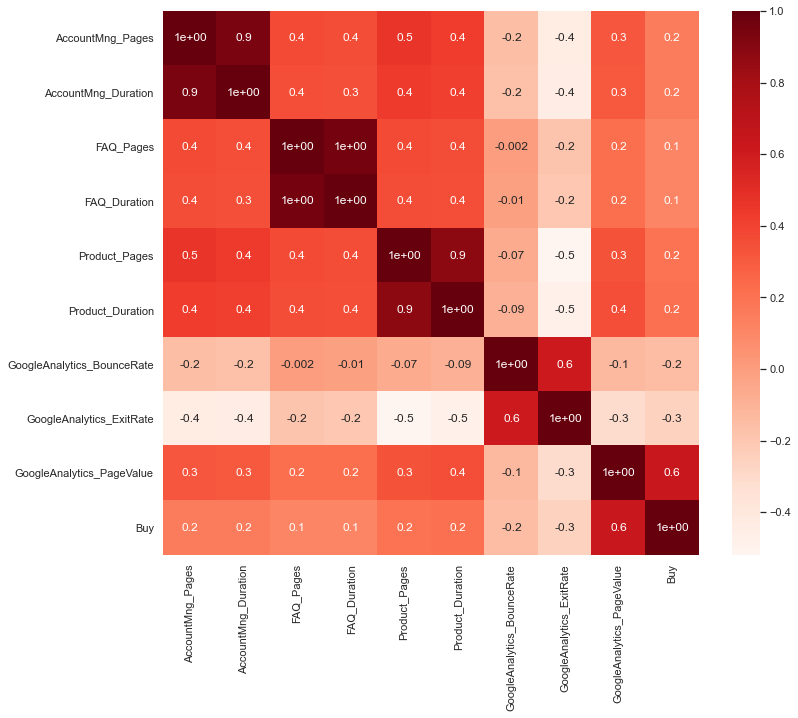

In [42]:
cor_heatmap(cor_spearman)

Observations:
- Features highly correlated (keep only one):
    - __'AccountMng_Pages'__ and __'AccountMng_Duration'__ (Number of pages visited and total amount of time spent by the user - account management related pages)
    - __'FAQ_Pages'__ and __'FAQ_Duration'__ (Number of pages visited and total amount of time spent by the user - FAQ related pages)
    - __'Product_Pages'__ and __'Product_Duration'__ (Number of pages visited and total amount of time spent by the user - Product related pages)
    - __'GoogleAnalytics_BounceRate'__ and __'GoogleAnalytics_ExitRate'__ (Bounce and exit rate, both explains the the exit rate of the pages visited by the user)

In [43]:
#lasso part 1: correlated features only
X_train_num_sub = X_train_num[['AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages', 'FAQ_Duration',
       'Product_Pages', 'Product_Duration', 'GoogleAnalytics_BounceRate',
       'GoogleAnalytics_ExitRate']]

In [44]:
lasso1 = LogisticRegression(penalty='l1', solver='liblinear')
lasso1.fit(X_train_num_sub, y_train)
coef = pd.Series(lasso1.coef_[0], index = X_train_num_sub.columns)

In [45]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 7 variables and eliminated the other 1 variables


In [46]:
coef.sort_values()

GoogleAnalytics_ExitRate     -2.927407e+01
Product_Pages                -2.823894e-04
AccountMng_Duration          -4.998713e-08
GoogleAnalytics_BounceRate    0.000000e+00
FAQ_Duration                  6.446406e-05
Product_Duration              9.438395e-05
AccountMng_Pages              1.523575e-03
FAQ_Pages                     4.809579e-02
dtype: float64

Observations:
- the number of pages visited variables were more valuable for the first three pairs, and ‘GoogleAnalytics_ExitRate’ was more important than ‘GoogleAnalytics_BounceRate’, so the latter variable was dropped for each of the above pairs.

In [47]:
# X_train_power.drop(["GoogleAnalytics_BounceRate","AccountMng_Duration","Product_Duration","FAQ_Duration"], inplace=True, axis=1)
# X_val_power.drop(["GoogleAnalytics_BounceRate","AccountMng_Duration","Product_Duration","FAQ_Duration"], inplace=True, axis=1)

In [48]:
#chi-squared test for categorical variables 
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [49]:
df_sub = df_train[['Date', 'OS', 'Browser', 'Country', 'Type_of_Traffic', 'Type_of_Visitor']]

In [50]:
for var in df_sub:
    TestIndependence(df_train[var],df_train["Buy"], var)

Date is IMPORTANT for Prediction
OS is IMPORTANT for Prediction
Browser is IMPORTANT for Prediction
Country is NOT an important predictor. (Discard Country from model)
Type_of_Traffic is IMPORTANT for Prediction
Type_of_Visitor is IMPORTANT for Prediction


In [51]:
# X_train_power.drop("Country",inplace=True,axis=1)
# X_val_power.drop("Country",inplace=True,axis=1)

In [52]:
X_train_num_power = X_train_power.select_dtypes(include=np.number).set_index(X_train_power.index)
X_val_num_power = X_val_power.select_dtypes(include=np.number).set_index(X_val_power.index)

In [53]:
#lasso regression part 2
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [54]:
lasso2 = LogisticRegression(penalty='l1', solver='liblinear', C=.4)
lasso2.fit(X_train_num_power, y_train)
coef = pd.Series(lasso2.coef_[0], index = X_train_num_power.columns)

In [55]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 29 variables and eliminated the other 16 variables


In [56]:
coef.sort_values()

Product_Pages                -0.638987
GoogleAnalytics_ExitRate     -0.435420
logAccountMng_Pages          -0.399281
is_apple                     -0.226161
Type_of_Traffic_13           -0.218268
FAQ_Duration                 -0.182873
Month                        -0.147607
GoogleAnalytics_BounceRate   -0.111967
Type_of_Visitor_return       -0.095868
logAccountMng_Duration       -0.087573
logFAQ_Pages                 -0.073149
OS_MacOSX                    -0.024958
Product                      -0.007043
Time_not_visited             -0.005704
country_gdp_2019             -0.003119
country_digital_2019         -0.000068
Type_of_Traffic_7             0.000000
OS_Ubuntu                     0.000000
OS_Fedora                     0.000000
OS_Chrome OS                  0.000000
Type_of_Traffic_9             0.000000
OS_iOS                        0.000000
OS_Windows                    0.000000
Type_of_Traffic_5             0.000000
Type_of_Traffic_4             0.000000
AccountMng_Duration      

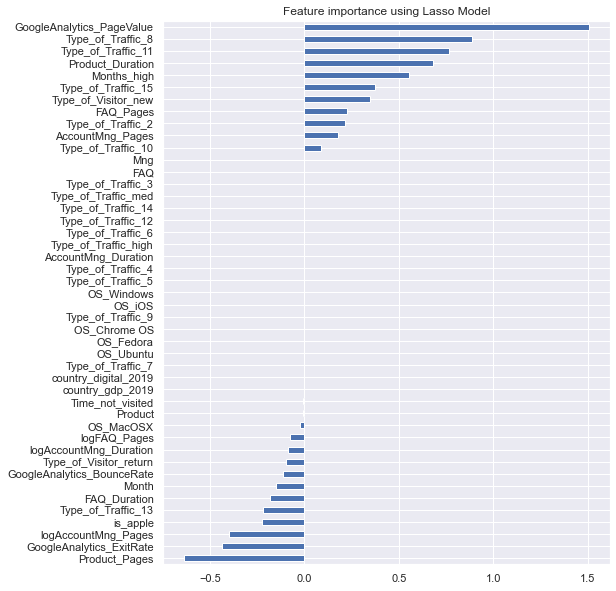

In [57]:
plot_importance(coef,'Lasso')

In [58]:
X_train_num_power.drop(['OS_Ubuntu','Type_of_Traffic_5','OS_Fedora',
                        'OS_Chrome OS','Type_of_Traffic_9','Type_of_Traffic_7',
                        'Type_of_Traffic_6','OS_Windows','Type_of_Traffic_3',
                        'Type_of_Traffic_14','Type_of_Traffic_12','Type_of_Traffic_med',
                        'Type_of_Traffic_high','Type_of_Traffic_4'], inplace=True, axis=1)
X_val_num_power.drop(['OS_Ubuntu','Type_of_Traffic_5','OS_Fedora',
                        'OS_Chrome OS','Type_of_Traffic_9','Type_of_Traffic_7',
                        'Type_of_Traffic_6','OS_Windows','Type_of_Traffic_3',
                        'Type_of_Traffic_14','Type_of_Traffic_12','Type_of_Traffic_med',
                        'Type_of_Traffic_high','Type_of_Traffic_4'], inplace=True, axis=1)

In [59]:
#RFE loop test with remaining variables

#no of features
nof_list=np.arange(1,27)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LogisticRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_num_power,y_train)
    X_val_rfe = rfe.transform(X_val_num_power)
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_val_rfe,y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 20
Score with 20 features: 0.889200


In [60]:
model = LogisticRegression()
rfe = RFE(estimator = model, n_features_to_select = 10)
X_rfe = rfe.fit_transform(X = X_train_num_power, y = y_train)
selected_features = pd.Series(rfe.support_, index = X_train_num_power.columns)
selected_features

AccountMng_Pages              False
AccountMng_Duration           False
FAQ_Pages                     False
FAQ_Duration                  False
Product_Pages                 False
Product_Duration              False
GoogleAnalytics_BounceRate    False
GoogleAnalytics_ExitRate       True
GoogleAnalytics_PageValue      True
Type_of_Visitor_new            True
Type_of_Visitor_return        False
Type_of_Traffic_10            False
Type_of_Traffic_11             True
Type_of_Traffic_13             True
Type_of_Traffic_15             True
Type_of_Traffic_2             False
Type_of_Traffic_8              True
Month                         False
Months_high                    True
Time_not_visited              False
is_apple                       True
OS_MacOSX                     False
OS_iOS                        False
Mng                           False
FAQ                           False
Product                       False
country_gdp_2019              False
country_digital_2019        

In [61]:
model = LogisticRegression()
rfe = RFE(estimator = model, n_features_to_select = 4)
X_rfe = rfe.fit_transform(X = X_train_num_power, y = y_train)
selected_features = pd.Series(rfe.support_, index = X_train_num_power.columns)
selected_features

AccountMng_Pages              False
AccountMng_Duration           False
FAQ_Pages                     False
FAQ_Duration                  False
Product_Pages                 False
Product_Duration              False
GoogleAnalytics_BounceRate    False
GoogleAnalytics_ExitRate      False
GoogleAnalytics_PageValue      True
Type_of_Visitor_new            True
Type_of_Visitor_return        False
Type_of_Traffic_10            False
Type_of_Traffic_11             True
Type_of_Traffic_13            False
Type_of_Traffic_15            False
Type_of_Traffic_2             False
Type_of_Traffic_8              True
Month                         False
Months_high                   False
Time_not_visited              False
is_apple                      False
OS_MacOSX                     False
OS_iOS                        False
Mng                           False
FAQ                           False
Product                       False
country_gdp_2019              False
country_digital_2019        

Observations:
- Important variables include 'GoogleAnalytics_PageValue', 'Type_of_Visitor_return', 'Type_of_Traffic_11' and 'Type_of_Traffic_8'

<a class="anchor" id="4th-bullet">


### 4.3 Data Balancing

</a>



In [62]:
# Test of oversampling using RandomOverSampler method

ros = RandomOverSampler(random_state=5)
X_train_over_ros, y_train_over_ros = ros.fit_resample(X_train_num_power, y_train)

#define model
model9 = LogisticRegression(random_state=5).fit(X_train_over_ros, y_train_over_ros)
y_pred_train = model9.predict(X_train_over_ros)
y_pred_val = model9.predict(X_val_num_power)

#results
print('f1_train:', f1_score(y_train_over_ros, y_pred_train))
print(confusion_matrix(y_val, y_pred_val))
print('precision:', precision_score(y_val, y_pred_val))
print('f1_val:', f1_score(y_val, y_pred_val))

f1_train: 0.838884776708611
[[1870  242]
 [  83  305]]
precision: 0.5575868372943327
f1_val: 0.6524064171122994


In [63]:
# Test of oversampling using SMOTE method

smote = SMOTE(random_state=5)
X_train_over_smt, y_train_over_smt = smote.fit_resample(X_train_num_power, y_train)

#define model
model10 = LogisticRegression(random_state=5).fit(X_train_over_smt, y_train_over_smt)
y_pred_train = model10.predict(X_train_over_smt)
y_pred_val = model10.predict(X_val_num_power)

#results
print('f1_train:', f1_score(y_train_over_smt, y_pred_train))
print(confusion_matrix(y_val, y_pred_val))
print('precision:', precision_score(y_val, y_pred_val))
print('f1_val:', f1_score(y_val, y_pred_val))

f1_train: 0.8769549952122567
[[1881  231]
 [  88  300]]
precision: 0.5649717514124294
f1_val: 0.6528835690968444


In [64]:
# Test Undersamplig - buy = 20% 

#joining y_train and x_train
under_df = pd.concat([X_train_num_power,y_train],axis=1)

#we randomly undersample our negative data until negatives our buy rate is 20% 
negative = under_df.loc[under_df.Buy==0]
positive = under_df.loc[under_df.Buy==1]

# shuffling the negative data
negative = negative.sample(frac=1, random_state=0)

# selecting 4 times the length of positive data
negative_under = negative[:int(4*len(positive))]

# concatinating dataset
df_under = pd.concat([positive,negative_under],axis=0)

#shuffling
df_under = df_under.sample(frac=1, random_state=0)

# After undersampling
X_train_under_20 = df_under.drop('Buy', axis=1)
y_train_under_20 = df_under['Buy']

#define model
model11 = LogisticRegression(random_state=5).fit(X_train_under_20, y_train_under_20)
y_pred_train = model11.predict(X_train_under_20)
y_pred_val = model11.predict(X_val_num_power)

#results
print('f1_train:', f1_score(y_train_under_20, y_pred_train))
print(confusion_matrix(y_val, y_pred_val))
print('precision:', precision_score(y_val, y_pred_val))
print('f1_val:', f1_score(y_val, y_pred_val))

f1_train: 0.700382490437739
[[1939  173]
 [ 113  275]]
precision: 0.6138392857142857
f1_val: 0.6578947368421052


Observations:
- Both Oversampling methods resulted in overfitting the model with the train data
- The Undersampling method had a better result, it overfitted to the train data a little, but had a better f1 score in the Validation data.

<a class="anchor" id="4th-bullet">


## 5. Modeling

</a>

In [65]:
X_train_model = X_train_num_power.copy()
y_train_model = y_train.copy()
X_val_model = X_val_num_power.copy()
y_val_model = y_val.copy()

# Selected features according to several tests of importance
X_selected = X_train_model[["Months_high","Type_of_Visitor_return",'GoogleAnalytics_ExitRate',  'GoogleAnalytics_PageValue']]

Defined 16 models
>Logistic: 0.665 (+/-0.020)
>Ridge-0.1: 0.671 (+/-0.023)
>SGD: 0.584 (+/-0.201)
>Passive Aggressive: 0.337 (+/-0.222)
>KNN-13: 0.616 (+/-0.039)
>Decision Tree: 0.651 (+/-0.022)
>Extra Tree: 0.545 (+/-0.035)
>SVM-linear: 0.665 (+/-0.022)
>SVM-poly: 0.636 (+/-0.043)
>SVMr-0.6: 0.621 (+/-0.044)
>Bayes: 0.668 (+/-0.021)
>Ada: 0.617 (+/-0.031)
>Bagging: 0.567 (+/-0.033)
>Random Forest: 0.670 (+/-0.022)
>Extra Trees: 0.565 (+/-0.044)
>GBoost: 0.607 (+/-0.037)

Rank=1, Name=Ridge-0.1, Score=0.671 (+/- 0.023)
Rank=2, Name=Random Forest, Score=0.670 (+/- 0.022)
Rank=3, Name=Bayes, Score=0.668 (+/- 0.021)
Rank=4, Name=Logistic, Score=0.665 (+/- 0.020)
Rank=5, Name=SVM-linear, Score=0.665 (+/- 0.022)
Rank=6, Name=Decision Tree, Score=0.651 (+/- 0.022)
Rank=7, Name=SVM-poly, Score=0.636 (+/- 0.043)
Rank=8, Name=SVMr-0.6, Score=0.621 (+/- 0.044)
Rank=9, Name=Ada, Score=0.617 (+/- 0.031)
Rank=10, Name=KNN-13, Score=0.616 (+/- 0.039)
Rank=11, Name=GBoost, Score=0.607 (+/- 0.037)
Ran

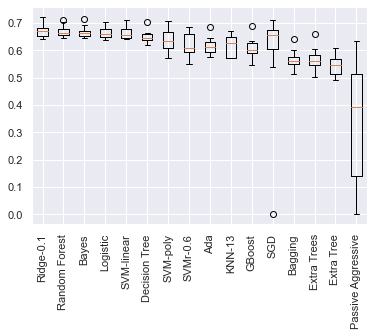

In [66]:
# run the test with several models - rank and boxplot f1 score
# binary classification spot check script
# Reference https://machinelearningmastery.com/spot-check-machine-learning-algorithms-in-python/

# load the dataset, returns X and y elements
def load_dataset():
	X = X_selected
	y = y_train_model
	return X, y

# create a dict of standard models to evaluate {name:object}
def define_models(models=dict()):
	# linear models
	models['Logistic'] = LogisticRegression(class_weight='balanced', random_state=7)
	alpha = [0.1] # excluded 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0
	for a in alpha:
		models['Ridge-'+str(a)] = RidgeClassifier(alpha=a, random_state=7)
	models['SGD'] = SGDClassifier(max_iter=1000, tol=1e-3, random_state=7)
	models['Passive Aggressive'] = PassiveAggressiveClassifier(max_iter=1000, tol=1e-3, random_state=7)
	# non-linear models
	models['KNN-13'] = KNeighborsClassifier(n_neighbors=13)
	models['Decision Tree'] = DecisionTreeClassifier(max_depth = 6, class_weight='balanced', random_state=7)
	models['Extra Tree'] = ExtraTreeClassifier( random_state=7)
	models['SVM-linear'] = SVC(kernel='linear', random_state=7)
	models['SVM-poly'] = SVC(kernel='poly', random_state=7)
	models['SVMr-0.6'] = SVC(C=0.6, random_state=7)
	models['Bayes'] = GaussianNB(var_smoothing=0.0001)
	# ensemble models
	n_trees = 100
	models['Ada'] = AdaBoostClassifier(n_estimators=n_trees, random_state=7)
	models['Bagging'] = BaggingClassifier(n_estimators=n_trees, random_state=7)
	models['Random Forest'] = RandomForestClassifier(max_depth = 6, class_weight='balanced', random_state=7)
	models['Extra Trees'] = ExtraTreesClassifier(n_estimators=n_trees, random_state=7)
	models['GBoost'] = GradientBoostingClassifier(n_estimators=n_trees, random_state=7)
	print('Defined %d models' % len(models))
	return models

# create a feature preparation pipeline for a model
def make_pipeline(model):
	steps = list()
	# the model
	steps.append(('model', model))
	# create pipeline
	pipeline = Pipeline(steps=steps)
	return pipeline

# evaluate a single model
def evaluate_model(X, y, model, folds, metric):
	# create the pipeline
	pipeline = make_pipeline(model)
	# evaluate model
	scores = cross_val_score(pipeline, X, y, scoring=metric, cv=folds, n_jobs=-1)
	return scores

# evaluate a model and try to trap errors and and hide warnings
def robust_evaluate_model(X, y, model, folds, metric):
	scores = None
	try:
		with warnings.catch_warnings():
			warnings.filterwarnings("ignore")
			scores = evaluate_model(X, y, model, folds, metric)
	except:
		scores = None
	return scores

# evaluate a dict of models {name:object}, returns {name:score}
def evaluate_models(X, y, models, folds=10, metric='f1'):
	results = dict()
	for name, model in models.items():
		# evaluate the model
		scores = robust_evaluate_model(X, y, model, folds, metric)
		# show process
		if scores is not None:
			# store a result
			results[name] = scores
			mean_score, std_score = mean(scores), std(scores)
			print('>%s: %.3f (+/-%.3f)' % (name, mean_score, std_score))
		else:
			print('>%s: error' % name)
	return results

# print and plot the top n results
def summarize_results(results, maximize=True, top_n=16):
	# check for no results
	if len(results) == 0:
		print('no results')
		return
	# determine how many results to summarize
	n = min(top_n, len(results))
	# create a list of (name, mean(scores)) tuples
	mean_scores = [(k,mean(v)) for k,v in results.items()]
	# sort tuples by mean score
	mean_scores = sorted(mean_scores, key=lambda x: x[1])
	# reverse for descending order (e.g. for accuracy)
	if maximize:
		mean_scores = list(reversed(mean_scores))
	# retrieve the top n for summarization
	names = [x[0] for x in mean_scores[:n]]
	scores = [results[x[0]] for x in mean_scores[:n]]
	# print the top n
	print()
	for i in range(n):
		name = names[i]
		mean_score, std_score = mean(results[name]), std(results[name])
		print('Rank=%d, Name=%s, Score=%.3f (+/- %.3f)' % (i+1, name, mean_score, std_score))
	# boxplot for the top n
	plt.boxplot(scores, labels=names)
	_, labels = plt.xticks()
	plt.setp(labels, rotation=90)
	plt.savefig('spotcheck.png')

# load dataset
X, y = load_dataset()
# get model list
models = define_models()
# evaluate models
results = evaluate_models(X, y, models)
# summarize results
summarize_results(results)

<a class="anchor" id="4th-bullet">


### 5.1 Logistic Classification

</a>

In [67]:
#applying the undersampling to our logistic model

#joining y_train and x_train
under_df = pd.concat([X_train_model,y_train_model],axis=1)
#we randomly undersample our negative data until negatives our buy rate is 20% 
negative = under_df.loc[under_df.Buy==0]
positive = under_df.loc[under_df.Buy==1]
# shuffling the negative data
negative = negative.sample(frac=1, random_state=0)
# selecting 4 times the length of positive data
negative_under = negative[:int(4*len(positive))]
# concatinating dataset
df_under = pd.concat([positive,negative_under],axis=0)
#shuffling
df_under = df_under.sample(frac=1, random_state=0)
# After undersampling
X_train_under_20_all = df_under.drop('Buy', axis=1)
y_train_under_20 = df_under['Buy']

X_train_under_20 = X_train_under_20_all[["Months_high","Type_of_Visitor_return",'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue']]
X_val_selected = X_val_model[["Months_high","Type_of_Visitor_return",'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue']]

#define model
model12 = LogisticRegression(class_weight='balanced').fit(X_train_under_20, y_train_under_20)
y_pred_train = model12.predict(X_train_under_20)
y_pred_val = model12.predict(X_val_selected)

#results
print('f1_train:', f1_score(y_train_under_20, y_pred_train))
print(confusion_matrix(y_val, y_pred_val))
print('precision:', precision_score(y_val, y_pred_val))
print('f1_val:', f1_score(y_val, y_pred_val))

f1_train: 0.7103369935630445
[[1873  239]
 [  83  305]]
precision: 0.5606617647058824
f1_val: 0.6545064377682404


<a class="anchor" id="4th-bullet">


### 5.3 Random Forest

</a>

In [68]:
def calculate_F1_rf(interval, parameter, max_depth = None):
    train_results = []
    test_results = []
       
    for value in interval:
        rf = RandomForestClassifier(max_depth = value, class_weight='balanced', random_state=5)
        rf.fit(X_train_model, y_train_model)
        train_pred = rf.predict(X_train_model)
        f1_train = f1_score(y_train_model, train_pred)
        train_results.append(f1_train)
        
        val_pred = rf.predict(X_val_model)
        f1_val = f1_score(y_val_model, val_pred)
        test_results.append(f1_val)
            
    print('The best f1 score for train is ' + str(max(train_results)) + ' for the depth of ' + str(train_results.index(max(train_results))+1))
    print('The best f1 score for val is ' + str(max(test_results)) + ' for the depth of ' + str(test_results.index(max(test_results))+1))
        
    fig, ax = plt.subplots(1,1,figsize=(8,6))
    plt.plot(interval, train_results, label = "Train F1")
    plt.plot(interval, test_results, label = "Val F1")
    plt.xticks(interval)
    plt.legend()
    plt.ylabel("F1 score")
    plt.xlabel(str(parameter))
    plt.show(ax)

The best f1 score for train is 0.9995706311721769 for the depth of 20
The best f1 score for val is 0.6651835372636262 for the depth of 9


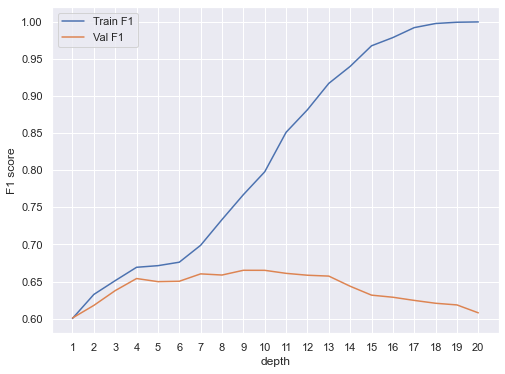

In [69]:
calculate_F1_rf(np.arange(1,21), 'depth')

Observations:
- Even if the best f1 score for the validation datadet is with a depth of 11, at this point the model is overfitting, since the f1 score for the train dataset is ~0.85
- To avoid overfitting it was selected the max_depth=6 as a better parameter.

<a class="anchor" id="4th-bullet">


## 6.   Evaluation 

</a>
<a class="anchor" id="4th-bullet">


### 6.1   Boosting/Stacking

</a>

In [70]:
# Testing different model to select two of them to try Stacking method

lr = LogisticRegression(class_weight='balanced', random_state=10)
nb = GaussianNB()
kn = KNeighborsClassifier()
dt = DecisionTreeClassifier(max_depth=3, class_weight='balanced', random_state=10)
nn = MLPClassifier(max_iter=5000, random_state=10)
bg = BaggingClassifier(random_state=10)
ab = AdaBoostClassifier(random_state=10)
rf = RandomForestClassifier(max_depth = 6, class_weight='balanced', random_state=10)
gb = GradientBoostingClassifier(random_state=10)

In [71]:
# define a function to return the f1 score for each model
def return_f1score(model):
    model_fit = model.fit(X_train_model, y_train)
    y_pred_val = model_fit.predict(X_val_model)
    score = f1_score(y_val, y_pred_val)
    return score

<AxesSubplot:xlabel='models', ylabel='f1'>

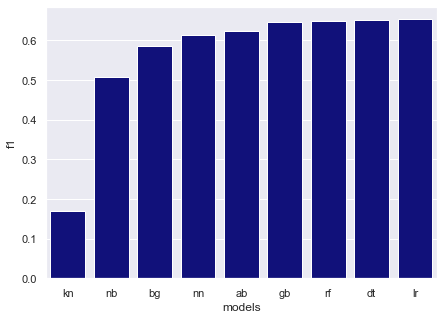

In [72]:
# define the models tested
models = [lr, nb, kn, dt, nn, bg, ab, rf, gb]

# create a list to store the f1 scores
f1_scores = []

# loop into each model and append the f1 score
for model in models:
    f1_scores.append(return_f1score(model))

# define a list of the names of the models as strings to use in the plot
names = ['lr', 'nb', 'kn', 'dt', 'nn', 'bg', 'ab', 'rf', 'gb']

# create a dataframe with a column as the model and another column as the f1 score - to use in the plot
df_models = pd.DataFrame()
df_models['models'] = names
df_models['f1'] = f1_scores
df_models = df_models.sort_values(by='f1')

fig, ax = plt.subplots(1,1,figsize=(7,5))
sns.barplot(data=df_models, x='models', y='f1', color='darkblue')

In [73]:
df_models.sort_values(by='f1', ascending=False)

,models,f1
0,lr,0.652406
3,dt,0.650372
7,rf,0.649087
8,gb,0.645248
6,ab,0.623244
4,nn,0.612352
5,bg,0.585586
1,nb,0.507270
2,kn,0.169811


In [74]:
# Since the ebest two models have similar aproaches - Random Forest and Decision,
# it was chosen to use a Satcking ensemble method with Random Forest and Logistic Regression

estimators = [('rf', RandomForestClassifier(max_depth = 6, class_weight='balanced', random_state=10)),
              ('lr', LogisticRegression(class_weight='balanced', random_state = 10))]

st = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

<AxesSubplot:xlabel='models', ylabel='f1'>

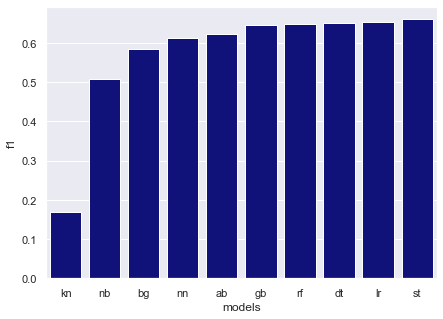

In [75]:
models = [lr, nb, kn, dt, nn, bg, ab, rf, gb, st]
f1_scores = []
for model in models:
    f1_scores.append(return_f1score(model))
    
names = ['lr', 'nb', 'kn', 'dt', 'nn', 'bg', 'ab', 'rf', 'gb', 'st']

df_models = pd.DataFrame()
df_models['models'] = names
df_models['f1'] = f1_scores
df_models = df_models.sort_values(by='f1')

fig, ax = plt.subplots(1,1,figsize=(7,5))
sns.barplot(data=df_models, x='models', y='f1', color='darkblue')

<AxesSubplot:xlabel='models', ylabel='f1'>

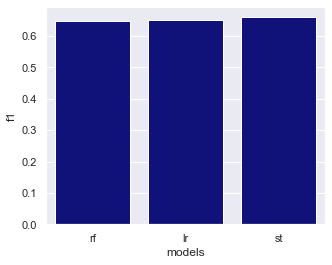

In [76]:
models = [lr,rf,st]
f1_scores = []
for model in models:
    f1_scores.append(return_f1score(model))
    
names = ['lr','rf','st']

df_models = pd.DataFrame()
df_models['models'] = names
df_models['f1'] = f1_scores
df_models = df_models.sort_values(by='f1')

fig, ax = plt.subplots(1,1,figsize=(5,4))
sns.barplot(data=df_models, x='models', y='f1', color='darkblue')

In [77]:
df_models.sort_values(by='f1', ascending=False)

,models,f1
2,st,0.659847
0,lr,0.652406
1,rf,0.649087


<a class="anchor" id="4th-bullet">


### 6.2   Grid Search

</a>

In [78]:
#define model
X_train_under_20 = X_train_under_20_all[["Months_high","Type_of_Visitor_return",'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue']]
X_val_selected = X_val_model[["Months_high","Type_of_Visitor_return",'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue']]

model_log_grid = LogisticRegression().fit(X_train_under_20, y_train_under_20)
y_pred_train = model_log_grid.predict(X_train_under_20)
y_pred_val = model_log_grid.predict(X_val_selected)
model_log_grid.coef_

array([[ 0.78920867, -0.66192237, -0.39801565,  1.4168287 ]])

In [79]:
parameter_space = {
    'fit_intercept': [True,False],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'], #if penalty='elasticnet', look at l1_ratio
    'class_weight': ['balanced'],
    'dual': [True,False],
    'tol': [1e-5,1e-4,1e-3,1e-2, 1e-1],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], #liblinear then look at intercept scaling
    'multi_class': ['auto', 'ovr', 'multinomial']
}

In [80]:
clf = GridSearchCV(model_log_grid, parameter_space, scoring = 'f1')

In [81]:
clf.fit(X_train_under_20, y_train_under_20)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'class_weight': ['balanced'], 'dual': [True, False],
                         'fit_intercept': [True, False],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [1e-05, 0.0001, 0.001, 0.01, 0.1]},
             scoring='f1')

In [82]:
clf.best_params_

{'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'multi_class': 'auto',
 'penalty': 'l1',
 'solver': 'liblinear',
 'tol': 1e-05}

In [83]:
#with 25% test set, undersampling of length 4, and 4 variables 
model_log_final = LogisticRegression(class_weight='balanced',tol=.01).fit(X_train_under_20, y_train_under_20)

y_pred_train = model_log_final.predict(X_train_under_20)
y_pred_val = model_log_final.predict(X_val_selected)
print(model_log_final.coef_)
print('f1_val:', f1_score(y_val_model, y_pred_val))

[[ 1.26543343 -0.48746602 -0.36557687  1.481754  ]]
f1_val: 0.6545064377682404


<a class="anchor" id="4th-bullet">


### 6.3  Probability Threshold

</a>

In [84]:
#f1 score with .5 threshold
model_log_final.coef_
print('f1_val:', f1_score(y_val, y_pred_val))

f1_val: 0.6545064377682404


Best Threshold=0.728278, F-Score=0.667


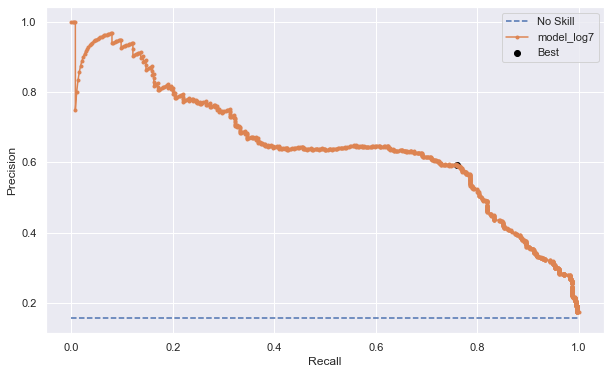

In [85]:
# Best Threshold in the train dataset

# predict probabilities
yhat = model_log_final.predict_proba(X_val_selected)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate precision recall curves
precision, recall, thresholds = precision_recall_curve(y_val_model, yhat)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(y_val_model[y_val_model==1]) / len(y_val_model)
plt.figure(figsize=(10,6))
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='model_log7')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot

plt.show()

In [86]:
#f1 score with new threshold 
y_pred_val_new_threshold = (model_log_final.predict_proba(X_val_selected)[:,1]>=0.728278).astype(int)
print('f1_train:', f1_score(y_train_under_20, y_pred_train))
print(confusion_matrix(y_val, y_pred_val_new_threshold))
print('precision:', precision_score(y_val, y_pred_val_new_threshold))
print('f1_val:', f1_score(y_val, y_pred_val_new_threshold))

f1_train: 0.7103369935630445
[[1910  202]
 [  93  295]]
precision: 0.5935613682092555
f1_val: 0.6666666666666666
